In [1]:
from IPython.display import HTML
HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<!---
<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>
-->
''')

# Optimal Interpolation (OI) / Gauss-Markov smoothing

$\renewcommand{\vec}[1]{\mathbf{#1}}$
[](http://twister.caps.ou.edu/OBAN2016/OI_partI.pdf)
[](http://twister.caps.ou.edu/OBAN2016/OI_partII.pdf)
[](http://twister.caps.ou.edu/OBAN2016/METR5303_Lecture14.pdf)
[](Kalman filter)
[](https://team.inria.fr/moise/files/2012/03/Nodet_Intro_DataAssimilation.pdf)
[](http://scipy-cookbook.readthedocs.io/items/KalmanFiltering.html)
[](https://stackoverflow.com/questions/13901997/kalman-2d-filter-in-python)
From Kalnay, 2003 (Atmospheric Modeling, Data Assimilation and Predictability)

## Optimal Interpolation equation
With the optimal interpolation equation a statistical 'optimal' field $\vec{x^a}$ of a scalar (univariate, like temperature $\vec{x^a} = \vec{T^a}(x,y)$) or vector field (multivariate, $\vec{x^a} = \left[\vec{p}(x,y), \vec{u}(x,y), \vec{v}(x,y)\right]$) is determined, given a background field $\vec{x^b}$ on a two or three-dimensional grid and a number of $p$ observations $\vec{y^o}$ at irregular locations.

$$ \vec{x}^a = \vec{x}^b + \vec{W} \left[\vec{y}^o - H(\vec{x}^b)\right] = \vec{x}^b + \vec{W}\vec{d} $$

Where,

$\vec{x}^a$ - optimum analysis of a field of model variables, ie. $\vec{x}^a  = (p, u, v) $  
$\vec{x}^b$ - background field available at grid points  
$\vec{y}^o$ - set of observations available at irregularly spaced point with radius $\vec{r}_i$ from grid point  
$H$ - forward observational operator, converts background field into "observed first guesses"  
$\vec{d} $ - "innovation" or "observational increments" vector, defined as difference between the observation and the background mapped to the observational point via forward operator $H$

$\vec{x}^a$,
$\vec{x}^b$ - vectors of length $N$, the number of grid points times the number of model variables  
$\vec{y}^o$, $\vec{y}^b$,
$\vec{d}$ - vectors of length $P$, the number of observations

\begin{eqnarray}
\vec{x}^T = (x_1, x_2, \dots, x_N) & & \textrm{or multivariate} & & \vec{x}^T = (p_1, u_1, v_1, p_2, u_2, v_2, \dots, p_N, u_N, v_N) \\
\vec{y}^T = (y_1, y_2, \dots, y_P)
\end{eqnarray}

### Weight matrix

$$ \vec{W} = \vec{B}\vec{H}^T\left(\vec{R} + \vec{H}\vec{B}\vec{H}^T\right)^{-1} $$

$\vec{W}$ - weight matrix with shape ($N\times P$)  
$\vec{H}$ - linear observation operator matrix with shape ($P\times N$)  
$\vec{A}$ - analysis error covariance matrix with shape ($N\times N$)  
$\vec{B}$ - background error covariance matrix with shape ($N\times N$)  
$\vec{R}$ - observation error covariance matrix with shape ($P\times P$)


### Background error covariance matrix
<!---
** statistical assumptions (K2003 p.153) **

Analysis and background errors are defined as vectors of length $N$,

$$ \vec{\varepsilon}^a(x, y) = \vec{x}^a(x,y) - \vec{x}^t(x,y) $$
$$ \vec{\varepsilon}^b(x, y) = \vec{x}^b(x,y) - \vec{x}^t(x,y) $$

and observational errors as a vector of length $P$,

$$ \vec{\varepsilon}^o_i = \vec{y}^o(\vec{r}_i) - \vec{y}^t(\vec{r_i}) = \vec{y}^o(\vec{r}_i) - H[\vec{x}^t(\vec{r_i})]$$

The truth $\vec{x^t}$ is unknown and therefore the errors of the background and observations too, hence assumptions are made about their statistival properties, namely:
- the background and observations are unbiased
- the background is a good approximation of the truth, such that analysis and observations are background values plus small increments

The first assumption leads to the following expectations, the expected value is the average over many cases.

$$ \vec{A} = E\{\vec{\varepsilon}^a(\vec{\varepsilon}^a)^T\} $$
$$ \vec{B} = E\{\vec{\varepsilon}^b(\vec{\varepsilon}^b)^T\} $$
$$ \vec{R} = E\{\vec{\varepsilon}^o(\vec{\varepsilon}^o)^T\} $$

The second assumption leads to how the innovation or observational increments vector  is defined as shown in the according section below.

\begin{eqnarray} 
\vec{B} = \vec{D}^{1/2}\vec{C}\vec{D}^{1/2} \quad
\vec{D} =
\begin{bmatrix}
    \sigma_1^2 & 0 & \dots & 0 \\
    0 & \sigma_2^2 & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & \sigma_n^2
\end{bmatrix}
, 
\vec{C} =
\begin{bmatrix}
    \mu_{11} & \mu_{12} & \dots  & \mu_{1p} \\
    \mu_{21} & \mu_{22} & \dots  & \mu_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    \mu_{p1} & \mu_{p2} & \dots  & \mu_{pp}
\end{bmatrix}
\end{eqnarray}
-->

The background error covariance is a square matrix of size, $N\times N$, and the covariance is modelled by a Gaussian function that says something about how much observations influence each particular grid point. The circle of influence depends on both the radius from the grid point and the Rossby radius of deformation. 

$$
\vec{B} = 
\begin{bmatrix}
    b_{11} & b_{12} & \dots  & b_{1N} \\
    b_{21} & b_{22} & \dots  & b_{2N} \\
    \vdots & \vdots & \ddots & \vdots \\
    b_{N1} & b_{N2} & \dots  & b_{NN}
\end{bmatrix}
$$

where 
\begin{eqnarray}
b_{ij} = \mathrm{e}^{r_{ij}^2/\left(L_x^2 + L_y^2\right)} \quad \textrm{and}\\
r_{ij}^2 = (x_i - x_j)^2 + (y_i - y_j)^2
\end{eqnarray}

is the squared distance between two grid points $i$ and $j$. The horizontal length scales, $L_x$ and $L_y$, are defined by the Rossby radius of deformation

\begin{eqnarray}
L = \frac{NH}{\Omega}, \quad N = \frac{g}{\rho_0}\frac{\mathrm{d}\rho}{\mathrm{d}z}.
\end{eqnarray}

For each variable the background error variance is constant, such that $ b_{ii} = \sigma_{bg}^2 $, which is the background error variance at the grid point and assumed to be the same for all grid points. 

### Observartion error covariance matrix
If the observation errors of two seperate measurement locations are not correlated the observation error covariance matrix is diagonal.
$$
\vec{R} = 
\begin{bmatrix}
    \sigma_{o1}^2 & 0 & \dots & 0 \\
    0 & \sigma_{o1}^2 & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & \sigma_{oP}^2
\end{bmatrix}
$$

### Linear observation operator

The observation operator, $\vec{H}$, interpolates and/ or transforms variables at background grid points to observation locations. In case, the observed and analysed variables are the same, the coefficients in $\vec{H}$ are just interpolation coefficients, see example below. If this is not the case, the observation operator can also be used to transform the observed variables in analysed variables.

In the example below, 16 grid points are shown in black/ gray and 2 observations in red. The observation operator $\vec{H}$ is constructed from the bottom left grid point to the right and upward, the first observation is affected by the 6th, 7th, 10th and 11th grid point. The second observation is only affected by the last grid point and as such gets a weight factor 1 as shown in the following matrix,

\begin{eqnarray}
\tiny
\vec{H} = 
\begin{bmatrix}
    0 & 0 & 0 & 0 & 0 & (1 - w_{x1})(1 - w_{y1}) & w_{x1}(1 - w_{y1}) & 0 & 0 & (1 - w_{x1})w_{y1} & w_{x1}w_{y1} & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}.
\end{eqnarray}

The background values at the grid points are determined at the observations points by

$$ \vec{y^b} = \vec{H}\vec{x_b} $$


In [2]:
%load_ext tikzmagic

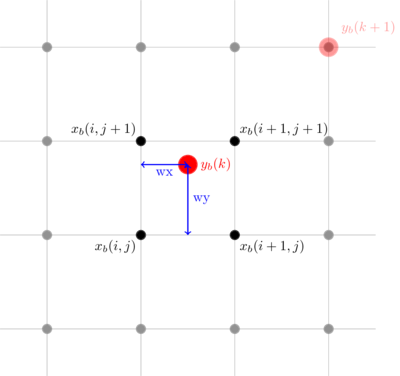

In [3]:
%%tikz -s 400,400 -sc 1.2 -f png
\draw [style=help lines, step=2]				(-1,-1)	grid		(+7,+7);
 
\draw [black] (  2,  2) node[anchor=north east] {$x_b(i  ,j  )$};
\draw [black] (  4,  2) node[anchor=north west] {$x_b(i+1,j  )$};
\draw [black] (  4,  4) node[anchor=south west] {$x_b(i+1,j+1)$};
\draw [black] (  2,  4) node[anchor=south east] {$x_b(i  ,j+1)$};
\draw [red] (  3,  3.5) node[right=0.2cm] {$y_b(k)$};
\draw [red, opacity=0.4] (  6,  6) node[above right=0.2cm] {$y_b(k+1)$};

\filldraw [color=gray]	(0,0) circle (.1);
\filldraw [color=gray]	(0,2) circle (.1);
\filldraw [color=gray]	(0,4) circle (.1);
\filldraw [color=gray]	(0,6) circle (.1);
\filldraw [color=gray]	(2,0) circle (.1);
\filldraw [color=black]	(2,2) circle (.1);
\filldraw [color=red]	(3,3.5) circle (.2);
\filldraw [color=black]	(2,4) circle (.1);
\filldraw [color=gray]	(2,6) circle (.1);
\filldraw [color=gray]	(4,0) circle (.1);
\filldraw [color=black]	(4,2) circle (.1);
\filldraw [color=black]	(4,4) circle (.1);
\filldraw [color=gray]	(4,6) circle (.1);
\filldraw [color=gray]	(6,0) circle (.1);
\filldraw [color=gray]	(6,2) circle (.1);
\filldraw [color=gray]	(6,4) circle (.1);
\filldraw [color=gray]	(6,6) circle (.1);
\filldraw [color=red, opacity=0.4]	(6,6) circle (.2);

\draw[blue, thick, <->] (2,3.5) -- (3,3.5) node[midway, below] {wx};
\draw[blue, thick, <->] (3,2) -- (3,3.5) node[midway, right] {wy};



### Innovation or observational increments vector
The observation vector, $\vec{y_o}$, and the background values at the observations points vector, $y_b$ form now the innovation or observational increments vector,  

$$ \vec{d} = \vec{y}^o - \vec{H}\vec{x^b}. $$


### Analysis error covariance matrix
The analysis error covariance matrix is defined as,
$$ \vec{A} = (\vec{I} - \vec{W}\vec{H})\vec{B}$$

with, $\vec{I}$, being an identity matrix with shape ($ n\times n$).

In [4]:
import numpy as np
from OceanPy.interpolation import OI

import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
# create some initial data points
x = np.array([1, -0.5, -0.5, 0.5, -1])
y = np.array([-0.5, 1, -0.5, 0.75, -1])
# T_o = 3*x**2 + 2*y**3 + 2
T_o = -2*x**3 - 3*y**2 + 3

# optimal interpolation
xx, yy, x_b, x_a = OI(x, y, T_o, Lx=0.5, gridsize=(20, 20))[0:4]

## Univariate analysis (scalar field)

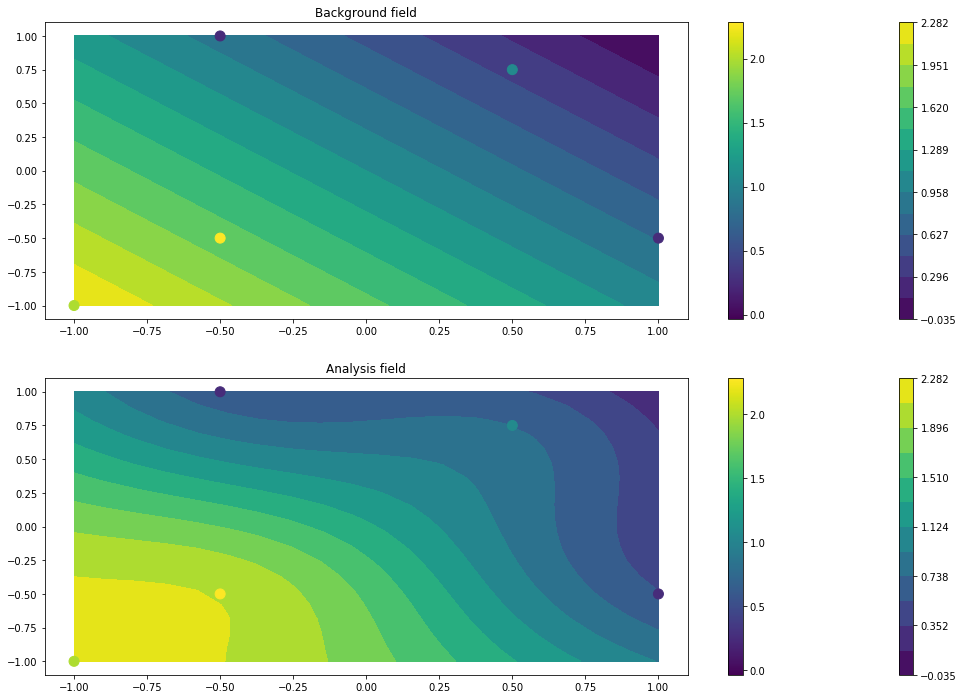

In [6]:
# plot background field
fig, ax = plt.subplots(2, 1, figsize=(18, 12))
vmin, vmax = x_b.min(), x_b.max()
cf = ax[0].contourf(xx, yy, x_b, np.linspace(vmin, vmax, 15))
plt.colorbar(cf, ax=ax[0])
scat = ax[0].scatter(x, y, c=T_o, s=100, vmin=vmin, vmax=vmax)
plt.colorbar(scat, ax=ax[0])
ax[0].set_title('Background field')

# plot analysis field
cf = ax[1].contourf(xx, yy, x_a[0], np.linspace(vmin, vmax, 13))
plt.colorbar(cf, ax=ax[1])
scat = ax[1].scatter(x, y, c=T_o, s=100, vmin=vmin, vmax=vmax)
plt.colorbar(scat, ax=ax[1])
ax[1].set_title('Analysis field')

for axis in range(len(ax)):
    ax[axis].set_xlim([-1.1, 1.1])
    ax[axis].set_ylim([-1.1, 1.1])

## Multivariate analysis (vector field)

### Geostrophic balance
[](http://pordlabs.ucsd.edu/ltalley/sio210/Geostrophy/)
[](https://marine.rutgers.edu/dmcs/ms501/2004/Notes/Wilkin20041101.htm)

$$ f u_g = - \frac{1}{\rho} \frac{\partial p}{\partial y} $$
$$ f v_g = \frac{1}{\rho} \frac{\partial p}{\partial x} $$

### Error covariance matrices

#### Horizontal correlations
$$ \rho^b\left(x_i, y_i, z_i, x_j, y_j, z_j\right) = \rho_H^b\left(x_i, y_i, x_j, y_j\right)\rho_V^b\left(z_i, z_j\right)$$

$$
b_{ij} =
\begin{bmatrix}
    \rho_{pp} & \rho_{pu} & \rho_{pv} \\
    \rho_{up} & \rho_{uu} & \rho_{uv} \\
    \rho_{vp} & \rho_{vu} & \rho_{vv}
\end{bmatrix}
$$

\begin{eqnarray}
\left.\begin{aligned}
\rho_{pp}(\vec{r_i}, \vec{r_j}) &= \mu_{ij} \\
\rho_{pu}(\vec{r_i}, \vec{r_j}) &= - \rho_{up}(\vec{r_i}, \vec{r_j}) = \frac{1}{f} \frac{\partial \mu_{ij}}{\partial y_{ij}} \\
\rho_{pv}(\vec{r_i}, \vec{r_j}) &= - \rho_{vp}(\vec{r_i}, \vec{r_j}) = - \frac{1}{f} \frac{\partial \mu_{ij}}{\partial x_{ij}} \\
\rho_{uu}(\vec{r_i}, \vec{r_j}) &= - \frac{1}{f^2} \frac{\partial^2 \mu_{ij}}{\partial y_{ij}^2} \\
\rho_{vv}(\vec{r_i}, \vec{r_j}) &= - \frac{1}{f^2} \frac{\partial^2 \mu_{ij}}{\partial x_{ij}^2} \\
\rho_{uv}(\vec{r_i}, \vec{r_j}) &= \rho_{vu}(\vec{r_i}, \vec{r_j}) = \frac{1}{f^2} \frac{\partial^2 \mu_{ij}}{\partial x_{ij}\partial y_{ij}} \\
\end{aligned}\right.
\end{eqnarray}


In [7]:
# define grid
nx, ny = 21, 21
lx, ly = 1, 1
xi, dx = np.linspace(-lx, lx, nx, retstep=True)
yi, dy = np.linspace(-ly, ly, ny, retstep=True)
xx, yy = np.meshgrid(xi, yi)
xc, yc = xi[0] + (nx - 1) * dx / 2, yi[0] + (ny - 1) * dy / 2

# create background field
nvar = 3
p_b = - xx * np.exp(- (2 * xx)**2 - (3 * yy)**2)
u_b = - np.gradient(p_b, dx)[0]
v_b = np.gradient(p_b, dy)[1]

# make synthetic observations
nobs = 50
err = 0.5
var = np.random.uniform(-err, err, nobs)
x = np.random.uniform(-lx, lx, nobs)
y = np.random.uniform(-ly, ly, nobs)
p_o = - x * np.exp(-(2 * (x + var))**2 - (3 * (y + var))**2)

# optimal interpolation
xx, yy, x_b, x_a, B, A = OI(x, y, p_o, xx=xx, yy=yy, bg_fld=(p_b, u_b, v_b), Lx=lx/6, mvoi='geostrophy')

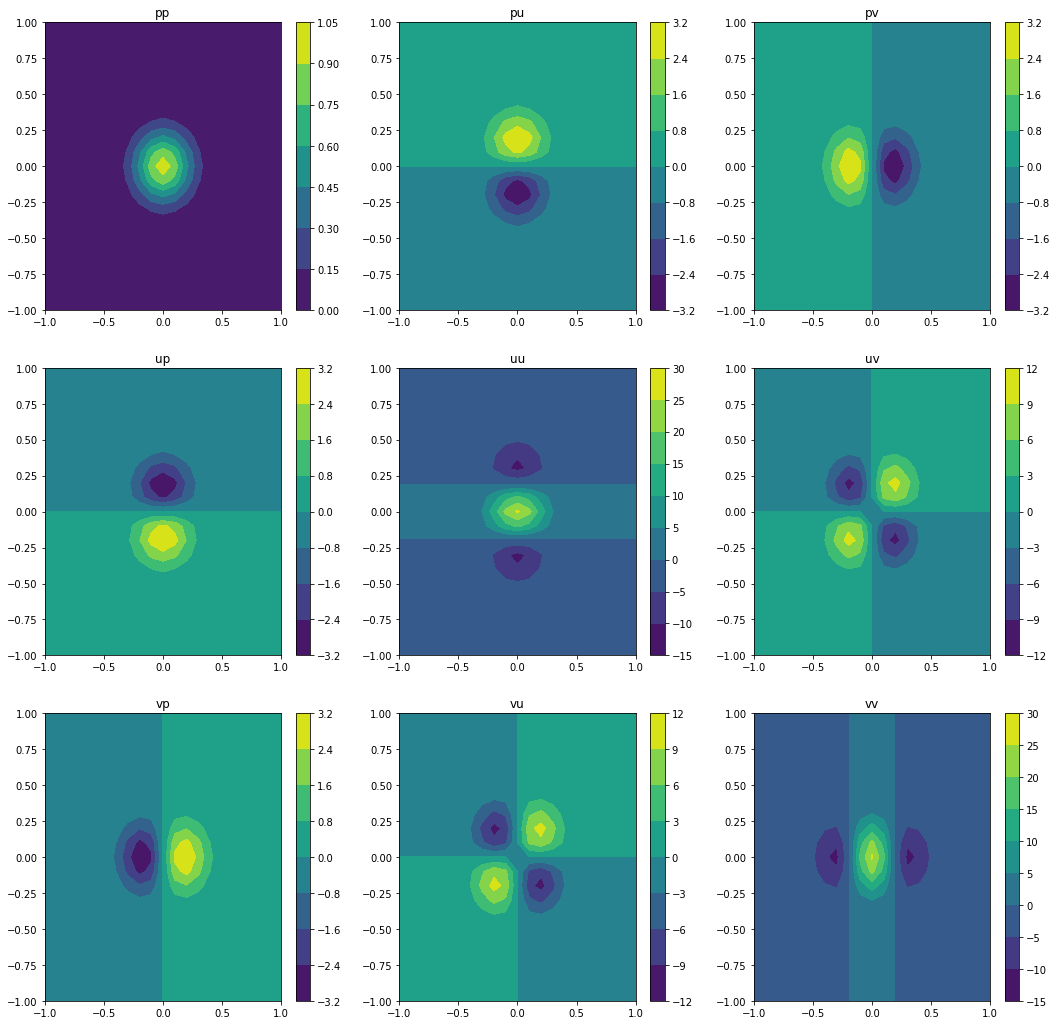

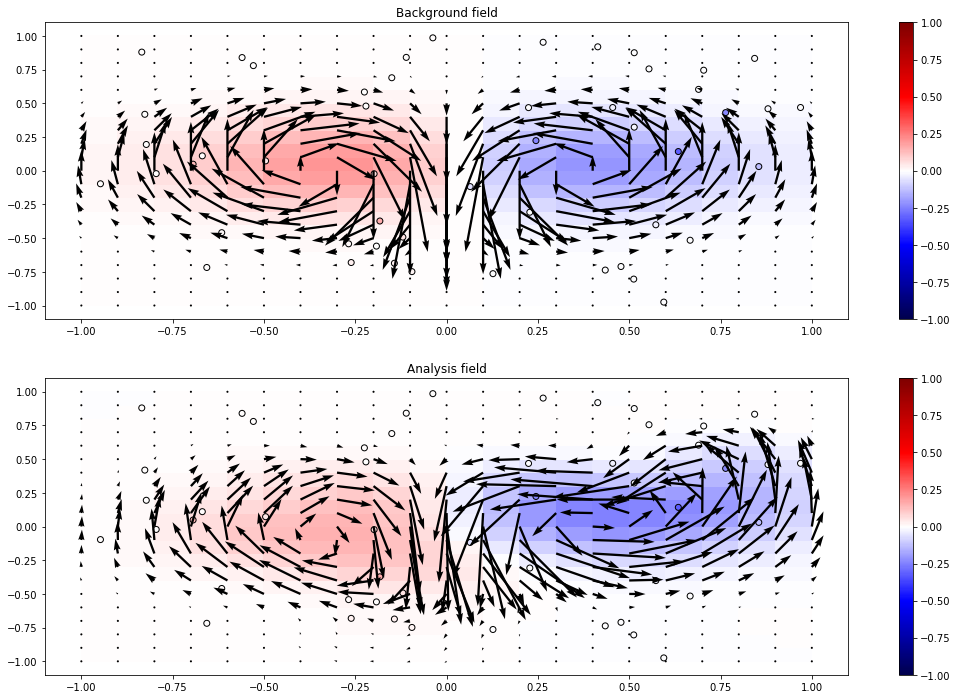

In [8]:
# plot covariance matrices
var = ['p', 'u', 'v']
coord = (int(np.floor(ny/2)), int(np.floor(nx/2)))
fig, ax = plt.subplots(nvar, nvar, figsize=(18, 18))
for ivar in range(nvar):
    for jvar in range(nvar):
        BB = np.reshape(B[ivar::nvar, jvar::nvar], (ny, nx, ny, nx))
        BBi = np.ma.masked_invalid(BB[coord[0], coord[1], :, :])
        conf = ax[ivar, jvar].contourf(xx, yy, BBi)
        ax[ivar, jvar].set_title(var[ivar] + var[jvar])
        # ax[ivar, jvar].set_xlim([-np.sqrt(2)*Lx, np.sqrt(2)*Lx])
        # ax[ivar, jvar].set_ylim([-np.sqrt(2)*Lx, np.sqrt(2)*Lx])
        plt.colorbar(conf, ax=ax[ivar, jvar])

# plot background field
fig, ax = plt.subplots(2, 1, figsize=(18, 12))
vmin, vmax = -1, 1
pcol = ax[0].pcolor(xx, yy, x_b[0], cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)
ax[0].scatter(x, y, c=p_o, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax, edgecolors='k')
plt.colorbar(pcol, ax=ax[0])
ax[0].quiver(xx, yy, x_b[1], x_b[2])
ax[0].set_title('Background field')

# plot analysis field
pcol = ax[1].pcolor(xx, yy, x_a[0], cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)
ax[1].scatter(x, y, c=p_o, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax, edgecolors='k')
plt.colorbar(pcol, ax=ax[1])
ax[1].quiver(xx, yy, x_a[1], x_a[2])
ax[1].set_title('Analysis field')

for axis in range(len(ax)):
    ax[axis].set_xlim([-1.1, 1.1])
    ax[axis].set_ylim([-1.1, 1.1])

#### Vertical correlations

### Hydrostatic balance

$$ \frac{\partial p}{\partial z} = -\rho g$$

### Geopotential/ Dynamic height

Rewrite hydrostatic balance to obtain geopotential,
$$\phi = \frac{1}{\rho} \mathrm{d}p = -g \mathrm{d}z$$

If we integrate the geopotential from a reference level towards the surface and normalize it by dividing the geopotential with the gravitational acceleration at mean sea level ($g_0$), than the dynamic height is obtained
$$ D = \frac{1}{g_0} \int_{p_{ref}}^p \frac{1}{\rho} \mathrm{d}p = \frac{1}{g_0} \int_{z_{ref}}^z g \mathrm{d}z$$

Geostrophic velocities in terms of dynamic height are found by rewriting the geostrophic balance and substituting the dynamic height

$$ f u_g = - \frac{\partial}{\partial y}\left(\frac{1}{\rho} \mathrm{d}p\right)$$
$$ u_g = - \frac{1}{f} \frac{\partial D}{\partial y}$$
$$ v_g = \frac{1}{f} \frac{\partial D}{\partial x}$$
